# Needed libraries

In [27]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense , LSTM ,Dropout ,SpatialDropout1D
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping ,  ModelCheckpoint
from sklearn.model_selection import train_test_split
import pyarabic.araby as araby


In [28]:
import os
import sys

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from matplotlib import rc
import joblib

from transformers import AutoTokenizer, AutoModel

# Reading the preprocessed dataset

In [29]:
path_input = '../input/let-mi/let-mi_train_part.csv'
df = pd.read_csv(path_input, lineterminator='\n')
df.head()

,text,category,misogyny,target\r
0,@AhmadMoussaly @DimaSadek اي نحن ما منقبلها صر...,discredit,misogyny,active\r
1,@berrynawal نوال شو قصتك كل يوم بتاكلي قتله شو...,none,none,none\r
2,@DimaSadek انشالله بيقبر قلبك عن قريب ...يافهي...,damning,misogyny,active\r
3,@DimaSadek @LBCI_NEWS @JeanFeghali يسلم لسانك ...,none,none,none\r
4,@RammalNaima @DimaSadek من بجيب الحشيش عبيروت ...,none,none,none\r


In [30]:
df=df.drop(columns=['category','target\r'])

In [31]:
df.head()

,text,misogyny
0,@AhmadMoussaly @DimaSadek اي نحن ما منقبلها صر...,misogyny
1,@berrynawal نوال شو قصتك كل يوم بتاكلي قتله شو...,none
2,@DimaSadek انشالله بيقبر قلبك عن قريب ...يافهي...,misogyny
3,@DimaSadek @LBCI_NEWS @JeanFeghali يسلم لسانك ...,none
4,@RammalNaima @DimaSadek من بجيب الحشيش عبيروت ...,none


In [32]:
data=pd.read_csv('../input/let-mi/ArMI2021_training.tsv',sep='\t')
data.head()


,tweet_id,text,misogyny,category
0,0,مستخدم@ وجعجع رئيسك رجل شو؟ ؟؟,none,none
1,1,مستخدم@ انتي مصدقه انك لكي اي لازمه انتي بنسبه...,misogyny,discredit
2,2,مستخدم@ متل كعب صباطك شعب رتش,none,none
3,3,مستخدم@ مستخدم@ مستخدم@ ليش الهجوم عليها؟ هي ع...,none,none
4,4,مستخدم@ اهلا وسهلا فيكي بطرابلس,none,none


In [33]:
data=data.drop(columns=['tweet_id','category'])

In [34]:
posti=pd.read_csv('../input/arabic-sentiment-twitter-corpus/train_Arabic_tweets_positive_20190413.tsv',names=['misogyny','text'],sep='\t')

In [35]:
positi=posti[0:1766]

In [36]:
df.to_csv('final1.csv',index=False)
data.to_csv('final1.csv',mode='a',index=False,header=False)

In [37]:
frame=pd.read_csv('final1.csv')
frame.shape

(13106, 2)

In [38]:
frame

,text,misogyny
0,@AhmadMoussaly @DimaSadek اي نحن ما منقبلها صر...,misogyny
1,@berrynawal نوال شو قصتك كل يوم بتاكلي قتله شو...,none
2,@DimaSadek انشالله بيقبر قلبك عن قريب ...يافهي...,misogyny
3,@DimaSadek @LBCI_NEWS @JeanFeghali يسلم لسانك ...,none
4,@RammalNaima @DimaSadek من بجيب الحشيش عبيروت ...,none
...,...,...
13101,RT مستخدم@: مستخدم@ اسمعي يا فطيرة الكشك ما حد...,misogyny
13102,مستخدم@ مستخدم@ معلومات عامة: لا يوجد ممثل للح...,none
13103,مستخدم@ أسأل الله ان يجعل يدك مشلوله وارجلك مع...,misogyny
13104,مستخدم@ الثورة عطتك عمرها يا معترة هههه,misogyny


In [39]:
positi['misogyny'] = positi['misogyny'].replace('pos','none')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
positi

,misogyny,text
0,none,نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...
1,none,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...
2,none,من الخير نفسه 💛
3,none,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...
4,none,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...
...,...,...
1761,none,والذين هم علىٰ صلاتهم يحافظون ❤
1762,none,⠀ *٨ - شعبان - ه* *اللهم بارك لنا في شعبان وبل...
1763,none,بإسمك ربي وضعت جنبي و بك ارفعه فإن امسكت نفسي ...
1764,none,#فورتنايت رابع :)


In [41]:
frame=pd.concat([frame,positi])

In [42]:
frame.shape

(14872, 2)

In [43]:
def remove_hashtag(df, col = 'text'):
    for letter in r'#.][!XR':
        df[col] = df[col].astype(str).str.replace(letter,'', regex=True)

In [44]:
remove_hashtag(frame)
frame

,text,misogyny
0,@AhmadMoussaly @DimaSadek اي نحن ما منقبلها صر...,misogyny
1,@berrynawal نوال شو قصتك كل يوم بتاكلي قتله شو...,none
2,@DimaSadek انشالله بيقبر قلبك عن قريب يافهيمة ...,misogyny
3,@DimaSadek @LBCI_NEWS @JeanFeghali يسلم لسانك ...,none
4,@ammalNaima @DimaSadek من بجيب الحشيش عبيروت ؟...,none
...,...,...
1761,والذين هم علىٰ صلاتهم يحافظون ❤,none
1762,⠀ *٨ - شعبان - ه* *اللهم بارك لنا في شعبان وبل...,none
1763,بإسمك ربي وضعت جنبي و بك ارفعه فإن امسكت نفسي ...,none
1764,فورتنايت رابع :),none


In [45]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

In [46]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [47]:
frame.to_csv('DATA.csv',index=False)

In [48]:
from nltk.stem.isri import ISRIStemmer
import re

stemmer = ISRIStemmer()
def processDocument(doc, stemmer): 

    #Replace @username with empty string
    doc = re.sub(r'@[^\s]+', ' ', doc)
    doc = re.sub(r'_', ' ', doc)
    doc = re.sub(r'\n', ' ', doc)
    doc = re.sub(r'\r', ' ', doc)
    doc = re.sub(r'مستخدم@', ' ', doc)
    doc = re.sub(r'[a-z,A-Z]', '', doc)
    doc = re.sub(r'\d', '', doc)
    #Convert www.* or https?://* to " "
    doc = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',doc)
    #Replace #word with word
    doc = re.sub(r'#([^\s]+)', r'\1', doc)
    # remove punctuations
    # normalize the tweet
#     doc= normalize_arabic(doc)
    # remove repeated letters
#     doc=remove_repeating_char(doc)
    #stemming
#     doc = stemmer.stem(doc)
   
    return doc

In [49]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [50]:
frame=frame.drop_duplicates()


In [51]:
frame.shape

(14569, 2)

In [92]:
test["text"] = test['text'].apply(lambda x: araby.strip_diacritics(x))


In [93]:
test["text"] = test['text'].apply(lambda x: processDocument(x, stemmer))

In [94]:
test["text"] = test['text'].apply(lambda x: deEmojify(x))

In [55]:
frame.iloc[10000].text

'  رح تاكلي كف مني لو شفتك بالمظاهرة'

In [95]:
frame.shape

(14569, 3)

In [57]:

frame['misogyny'].value_counts()

misogyny    7371
none        7198
Name: misogyny, dtype: int64

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


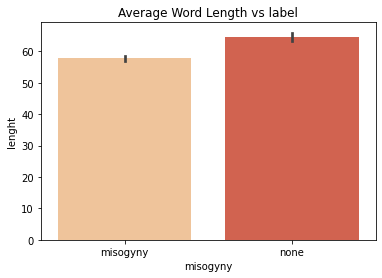

In [58]:
frame['lenght'] = frame['text'].apply(len)
fig1 = sns.barplot('misogyny','lenght',data = frame,palette="OrRd" )
plt.title('Average Word Length vs label')
plot = fig1.get_figure()
plot.savefig('Barplot.png')

In [59]:
frame.to_csv('data_after_preprocessing.csv',index=False)

In [60]:
frame

,text,misogyny,lenght
0,اي نحن ما منقبلها صرماية بإجرنا مبروكع راسكم,misogyny,48
1,نوال شو قصتك كل يوم بتاكلي قتله شو صاير معك ...,none,66
2,انشالله بيقبر قلبك عن قريب يافهيمة عصرك,misogyny,41
3,يسلم لسانك من مصر يا ديما نحن معك,none,39
4,من بجيب الحشيش عبيروت ؟ بعلبك يعني انتو,none,45
...,...,...,...
1761,والذين هم على صلاتهم يحافظون ❤,none,30
1762,⠀ * - شعبان - ه* *اللهم بارك لنا في شعبان وبلغ...,none,100
1763,بإسمك ربي وضعت جنبي و بك ارفعه فإن امسكت نفسي ...,none,117
1764,فورتنايت رابع :),none,16


# Seting some parameters and creating the word tokenizer

In [61]:
import torch
import pytorch_lightning as pl

from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [62]:
train, val = train_test_split(frame[['misogyny','text']], test_size=0.2, random_state=42)

train = train.rename(columns={'misogyny':"label"})
val = val.rename(columns={'misogyny':"label"})
lbl_enc = LabelEncoder()
train.loc[:,"label"] = lbl_enc.fit_transform(train["label"])
val.loc[:,"label"] = lbl_enc.transform(val["label"])
joblib.dump(lbl_enc,"label_encoder.pkl")
train.to_csv("train.csv",index=False)
val.to_csv("val.csv",index=False)

# Creating the tensors to be input for the model

In [63]:
val.shape

(2914, 2)

In [64]:
lbl_enc.classes_

array(['misogyny', 'none'], dtype=object)

In [65]:
class ArabicDataset(Dataset):
    def __init__(self,data,max_len,model_type="Mini"):
        super().__init__()
        self.labels = data["label"].values
        self.texts = data["text"].values
        self.max_len = max_len
        model = {"Mini": "asafaya/bert-mini-arabic",
                "Medium": "asafaya/bert-medium-arabic",
                "Base": "asafaya/bert-base-arabic",
                "Large": "asafaya/bert-large-arabic"}
        self.tokenizer = AutoTokenizer.from_pretrained(model[model_type])
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self,idx):
        text = " ".join(self.texts[idx].split())
        label = self.labels[idx]
        inputs = self.tokenizer(text,padding='max_length',
                                max_length=self.max_len,truncation=True,return_tensors="pt")
        #input_ids,token_type_ids,attention_mask
        return {
            "inputs":{"input_ids":inputs["input_ids"][0],
                      "token_type_ids":inputs["token_type_ids"][0],
                      "attention_mask":inputs["attention_mask"][0],
                     },
            "labels": torch.tensor(label,dtype=torch.long) 
        }
        


In [66]:
class ArabicDataModule(pl.LightningDataModule):
    def __init__(self,train_path,val_path,batch_size=12,max_len=100,model_type="Mini"):
        super().__init__()
        self.train_path,self.val_path= train_path,val_path
        self.batch_size = batch_size
        self.max_len = max_len
        self.model_type = model_type
    
    def setup(self,stage=None):
        train = pd.read_csv(self.train_path)
        val = pd.read_csv(self.val_path)
        self.train_dataset = ArabicDataset(data=train,max_len=self.max_len,model_type=self.model_type)
        self.val_dataset = ArabicDataset(data=val,max_len=self.max_len,model_type=self.model_type)
    
    def train_dataloader(self):
        return DataLoader(self.train_dataset,batch_size=self.batch_size,shuffle=True,num_workers=4)
    
    def val_dataloader(self):
        return DataLoader(self.val_dataset,batch_size=self.batch_size,shuffle=False,num_workers=4)

# Spliting the dataframe

In [67]:
import torch
from torch import nn,optim

from transformers import AutoTokenizer, AutoModel

from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split

In [68]:
print(torch.cuda.device_count())



2


In [70]:
from tqdm.auto import tqdm
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torch.load('/kaggle/input/my-model/model.pth', map_location=device)
model.to(device)

/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


ArabicBertModel(
  (bert_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32000, 512, padding_idx=0)
      (position_embeddings): Embedding(512, 512)
      (token_type_embeddings): Embedding(2, 512)
      (LayerNorm): LayerNorm((512,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=512, out_features=512, bias=True)
              (key): Linear(in_features=512, out_features=512, bias=True)
              (value): Linear(in_features=512, out_features=512, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=512, out_features=512, bias=True)
              (LayerNorm): LayerNorm((512,), eps=1e-12, elementwise_aff

In [69]:
class ArabicBertModel(pl.LightningModule):
    def __init__(self,model_type="Mini"):
        super().__init__()
        model = {"Mini": ("asafaya/bert-mini-arabic",256),
                "Medium": ("asafaya/bert-medium-arabic",512),
                "Base": ("asafaya/bert-base-arabic",768),
                "Large": ("asafaya/bert-large-arabic",1024)}
        self.bert_model = AutoModel.from_pretrained(model[model_type][0])
        self.fc = nn.Linear(model[model_type][1],18)
    
    def forward(self,inputs):
        out = self.bert_model(**inputs)#inputs["input_ids"],inputs["token_type_ids"],inputs["attention_mask"])
        pooler = out[1]
        out = self.fc(pooler)
        return out
    
    def configure_optimizers(self):
        return optim.AdamW(self.parameters(), lr=0.0001)
    
    def criterion(self,output,target):
        return nn.CrossEntropyLoss()(output,target)
    
    #TODO: adding metrics
    def training_step(self,batch,batch_idx):
        x,y = batch["inputs"],batch["labels"]
        out = self(x)
        loss = self.criterion(out,y)
        return loss
    
    def validation_step(self,batch,batch_idx):
        x,y = batch["inputs"],batch["labels"]
        out = self(x)
        loss = self.criterion(out,y)
        return loss

In [44]:
train

,label,text
10355,0,ابكي بترتاحي مجربة
5886,0,مش الشعب يا دابة هيدا معلمك الاميركي يا واطي...
8514,0,مستخدم مش انتو ل بتروحوا عالسفارات� ليش مي...
2058,0,بتلدغي حتى انتي وعم تكتبي ���
4429,1,عن جد ست يعني كل هل شي مزح ب مزح اذا هي...
...,...,...
5202,0,انت يا ام لفتن خليكي مسكرتيه لبوزك
393,1,لا لا لا نحاكمه برانا
5402,0,انتي هبلة يابت الوسخة ، اومال الناس اللي خرج...
860,1,تفضلي واصل صيتك عفلسطين


In [32]:
df=pd.read_csv("/kaggle/input/let-mi/test-data.csv")

In [33]:
df

,text,Label
0,بالله عليك ريحي جمالك\nوخطي الخوض في الشرع\nيا...,NaN
1,لو تريدين اخذ حقوق المرأة خوذيهم بطريقة الصح م...,NaN
2,ناقصة عقل ودين أنت يا صاحبة المنشور,NaN
3,اي عمل ممكن للمرأة اتقانه بأكثر كفاءة و دقة و ...,NaN
4,الشي الوحيد الذي تمهر فيه المرٱه عن الرجل هو ا...,NaN
5,العجيب امركم يتها النساء لماذا تكروهن جنسكم وت...,NaN
6,فعلا الرجل عاله وقت توا جميع نساء العالم الناج...,NaN
7,هذا هو الباطل بعينه المرأة تستطيع العيش بدون ر...,NaN
8,مافيش شي في الدنيا احلى من النساء🤤,NaN
9,مجرد ببغاوات تنقل وتقلد فقط لا غير,NaN


In [45]:
#TODO: getting different models sizes results
MODEL_TYPE = "Mini"
dm = ArabicDataModule(train_path="./train.csv",
                val_path = "./train.csv",
                batch_size=128,max_len=60, model_type=MODEL_TYPE)

model = ArabicBertModel(model_type=MODEL_TYPE)
trainer = pl.Trainer(max_epochs=10, default_root_dir='.')
trainer.fit(model,dm)

Downloading:   0%|          | 0.00/509 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/44.4M [00:00<?, ?B/s]

Some weights of the model checkpoint at asafaya/bert-mini-arabic were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/326k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [73]:
test=pd.read_csv("/kaggle/input/tesiso/test_data - test_data.csv")
test.rename(columns={'Text': 'text'}, inplace=True)

In [74]:
test

,text,Suggested label by a human annotator (Offensive/not Offensive),Suggested label by a human annotator (Misogyny/not Misogyny),Comments if any
0,بالله عليك ريحي جمالك\nوخطي الخوض في الشرع\nيا...,offensive,not Misogyny,NaN
1,لو تريدين اخذ حقوق المرأة خوذيهم بطريقة الصح م...,not offensive,not Misogyny,NaN
2,ناقصة عقل ودين أنت يا صاحبة المنشور,offensive,Misogyny,NaN
3,اي عمل ممكن للمرأة اتقانه بأكثر كفاءة و دقة و ...,not offensive,not Misogyny,NaN
4,الشي الوحيد الذي تمهر فيه المرٱه عن الرجل هو ا...,offensive,Misogyny,NaN
5,العجيب امركم يتها النساء لماذا تكروهن جنسكم وت...,not offensive,Misogyny,NaN
6,فعلا الرجل عاله وقت توا جميع نساء العالم الناج...,offensive,not Misogyny,NaN
7,هذا هو الباطل بعينه المرأة تستطيع العيش بدون ر...,not offensive,not Misogyny,NaN
8,مافيش شي في الدنيا احلى من النساء🤤,not offensive,not Misogyny,NaN
9,مجرد ببغاوات تنقل وتقلد فقط لا غير,offensive,not Misogyny,NaN


In [76]:
test['label']=-1
test.to_csv('test_data.csv',index=False)

In [96]:
from tqdm.auto import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

preds = []
real_values = []

load = ArabicDataModule(train_path="/kaggle/working/test_data.csv",val_path = "/kaggle/working/test_data.csv",batch_size=512,max_len=60)
load.setup()
test_dataloader = load.val_dataloader()

progress_bar = tqdm(range(len(test_dataloader)))

model.eval()
for batch in test_dataloader:    
    x,y = batch["inputs"],batch["labels"]
    inp = {k: v.to(device) for k, v in x.items()}
    
    with torch.no_grad():
        outputs = model(inp)

    predictions = torch.argmax(outputs, dim=-1)
    
    preds.extend(predictions)
    real_values.extend(y)

    progress_bar.update()
    
preds = torch.stack(preds).cpu()
real_values = torch.stack(real_values).cpu()

/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  0%|          | 0/1 [00:00<?, ?it/s]

In [80]:
preds

tensor([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [97]:
test["After_pro"]=preds.tolist()

In [98]:
test['After_pro'].value_counts()

1    23
0    14
Name: After_pro, dtype: int64

In [87]:
test['Suggested label by a human annotator (Misogyny/not Misogyny)'].value_counts()

not Misogyny    27
Misogyny        10
Name: Suggested label by a human annotator (Misogyny/not Misogyny), dtype: int64

In [88]:
test.rename(columns={'Suggested label by a human annotator (Misogyny/not Misogyny)': 'real'}, inplace=True)

In [84]:
test['Bert'].replace(0, "misogyny",inplace=True)
test['Bert'].replace(1, "none",inplace=True)

In [89]:
test['real'].replace("Misogyny", "misogyny",inplace=True)
test['real'].replace("not Misogyny", "none",inplace=True)

In [90]:
test

,text,Suggested label by a human annotator (Offensive/not Offensive),real,Comments if any,label,Bert
0,بالله عليك ريحي جمالك\nوخطي الخوض في الشرع\nيا...,offensive,none,NaN,-1,none
1,لو تريدين اخذ حقوق المرأة خوذيهم بطريقة الصح م...,not offensive,none,NaN,-1,misogyny
2,ناقصة عقل ودين أنت يا صاحبة المنشور,offensive,misogyny,NaN,-1,misogyny
3,اي عمل ممكن للمرأة اتقانه بأكثر كفاءة و دقة و ...,not offensive,none,NaN,-1,none
4,الشي الوحيد الذي تمهر فيه المرٱه عن الرجل هو ا...,offensive,misogyny,NaN,-1,misogyny
5,العجيب امركم يتها النساء لماذا تكروهن جنسكم وت...,not offensive,misogyny,NaN,-1,misogyny
6,فعلا الرجل عاله وقت توا جميع نساء العالم الناج...,offensive,none,NaN,-1,none
7,هذا هو الباطل بعينه المرأة تستطيع العيش بدون ر...,not offensive,none,NaN,-1,none
8,مافيش شي في الدنيا احلى من النساء🤤,not offensive,none,NaN,-1,none
9,مجرد ببغاوات تنقل وتقلد فقط لا غير,offensive,none,NaN,-1,none


In [102]:
test.drop(columns=['After_pro'],inplace=True)


In [105]:
test.to_csv('test_final_pred.csv',index=False)

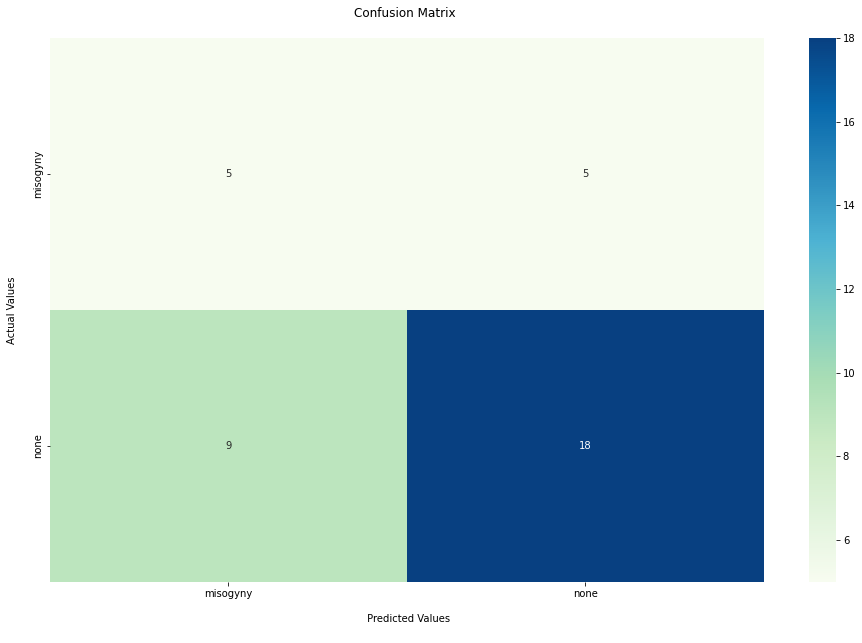

<Figure size 432x288 with 0 Axes>

In [106]:
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
fx=sns.heatmap(metrics.confusion_matrix(test['real'], test['Bert']), annot=True, fmt="d",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['misogyny', 'none'])
fx.yaxis.set_ticklabels(['misogyny', 'none'])
plt.show()
plt.savefig('Confusion_matrix.png')

# Setting some callbacks like early stoping and auto saving best models

In [31]:
df

,text,Label
0,بالله عليك ريحي جمالك\nوخطي الخوض في الشرع\nيا...,NaN
1,لو تريدين اخذ حقوق المرأة خوذيهم بطريقة الصح م...,NaN
2,ناقصة عقل ودين أنت يا صاحبة المنشور,NaN
3,اي عمل ممكن للمرأة اتقانه بأكثر كفاءة و دقة و ...,NaN
4,الشي الوحيد الذي تمهر فيه المرٱه عن الرجل هو ا...,NaN
5,العجيب امركم يتها النساء لماذا تكروهن جنسكم وت...,NaN
6,فعلا الرجل عاله وقت توا جميع نساء العالم الناج...,NaN
7,هذا هو الباطل بعينه المرأة تستطيع العيش بدون ر...,NaN
8,مافيش شي في الدنيا احلى من النساء🤤,NaN
9,مجرد ببغاوات تنقل وتقلد فقط لا غير,NaN


In [42]:
class ArabicDataModule(pl.LightningDataModule):
    def __init__(self,train_path,batch_size=12,max_len=100,model_type="Mini"):
        super().__init__()
        self.train_path= train_path
        self.batch_size = batch_size
        self.max_len = max_len
        self.model_type = model_type
    
    def setup(self,stage=None):
        train = self.train_path
        self.train_dataset = ArabicDataset(data=train,max_len=self.max_len,model_type=self.model_type)
    
    def train_dataloader(self):
        return DataLoader(self.train_dataset,batch_size=self.batch_size,shuffle=True,num_workers=4)
    
    def val_dataloader(self):
        return DataLoader(self.val_dataset,batch_size=self.batch_size,shuffle=False,num_workers=4)

In [28]:
preds

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0])

In [57]:
import pandas as pd
  
# initialize data of lists.
data = {'text': df['text'],'preds': preds.tolist()}
  
# Create DataFrame
data = pd.DataFrame(data)

In [58]:
data['preds']=data['preds'].replace(0, "misogyny")
data['preds']=data['preds'].replace(1, "none")

In [99]:
from sklearn.metrics import classification_report

print(classification_report(test['real'], test['Bert'], target_names=lbl_enc.classes_))

              precision    recall  f1-score   support

    misogyny       0.36      0.50      0.42        10
        none       0.78      0.67      0.72        27

    accuracy                           0.62        37
   macro avg       0.57      0.58      0.57        37
weighted avg       0.67      0.62      0.64        37



In [59]:
data

,text,preds
0,بالله عليك ريحي جمالك\nوخطي الخوض في الشرع\nيا...,misogyny
1,لو تريدين اخذ حقوق المرأة خوذيهم بطريقة الصح م...,none
2,ناقصة عقل ودين أنت يا صاحبة المنشور,none
3,اي عمل ممكن للمرأة اتقانه بأكثر كفاءة و دقة و ...,none
4,الشي الوحيد الذي تمهر فيه المرٱه عن الرجل هو ا...,misogyny
5,العجيب امركم يتها النساء لماذا تكروهن جنسكم وت...,none
6,فعلا الرجل عاله وقت توا جميع نساء العالم الناج...,none
7,هذا هو الباطل بعينه المرأة تستطيع العيش بدون ر...,misogyny
8,مافيش شي في الدنيا احلى من النساء🤤,none
9,مجرد ببغاوات تنقل وتقلد فقط لا غير,none


In [49]:
data.iloc[33].text

'النوعية هادي تلقاها خاشة لجمعية باش تحصل سيارة زي صاحبتها اللي بوها حرايمي وخانب اعتمادات'

In [47]:
data.to_csv('predicted_labels_mysoginic_tweets.csv',index=False)

In [84]:
data

,text,preds
0,@AhmadMoussaly @DimaSadek اي نحن ما منقبلها صر...,0
1,@berrynawal نوال شو قصتك كل يوم بتاكلي قتله شو...,1
2,@DimaSadek انشالله بيقبر قلبك عن قريب ...يافهي...,0
3,@DimaSadek @LBCI_NEWS @JeanFeghali يسلم لسانك ...,1
4,@RammalNaima @DimaSadek من بجيب الحشيش عبيروت ...,1
...,...,...
5235,@berrynawal تفه يا نوال,0
5236,@Asadlassa1 @DimaSadek هي هبلة الله يشفيها,0
5237,@yumnafawaz @samygemayel تفكيرك بسيط ومحدود طل...,1
5238,@DimaSadek ديما...فيكي بليز تعملي block لكل يل...,1


In [49]:
from sklearn.metrics import classification_report

print(classification_report(real_values, preds, target_names=lbl_enc.classes_))

              precision    recall  f1-score   support

    misogyny       1.00      1.00      1.00      5928
        none       1.00      1.00      1.00      5727

    accuracy                           1.00     11655
   macro avg       1.00      1.00      1.00     11655
weighted avg       1.00      1.00      1.00     11655



In [46]:
df

,text,Label,label
0,بالله عليك ريحي جمالك\nوخطي الخوض في الشرع\nيا...,NaN,-1
1,لو تريدين اخذ حقوق المرأة خوذيهم بطريقة الصح م...,NaN,-1
2,ناقصة عقل ودين أنت يا صاحبة المنشور,NaN,-1
3,اي عمل ممكن للمرأة اتقانه بأكثر كفاءة و دقة و ...,NaN,-1
4,الشي الوحيد الذي تمهر فيه المرٱه عن الرجل هو ا...,NaN,-1
5,العجيب امركم يتها النساء لماذا تكروهن جنسكم وت...,NaN,-1
6,فعلا الرجل عاله وقت توا جميع نساء العالم الناج...,NaN,-1
7,هذا هو الباطل بعينه المرأة تستطيع العيش بدون ر...,NaN,-1
8,مافيش شي في الدنيا احلى من النساء🤤,NaN,-1
9,مجرد ببغاوات تنقل وتقلد فقط لا غير,NaN,-1


In [ ]:
pd

In [54]:
from tqdm.auto import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

preds = []
real_values = []

load = ArabicDataModule(train_path="./val.csv",
                           val_path = "./train.csv",
                batch_size=512,max_len=60)
load.setup()
test_dataloader = load.train_dataloader()

progress_bar = tqdm(range(len(test_dataloader)))

model.eval()
for batch in test_dataloader:    
    x,y = batch["inputs"],batch["labels"]
    inp = {k: v.to(device) for k, v in x.items()}
    
    with torch.no_grad():
        outputs = model(inp)

    predictions = torch.argmax(outputs, dim=-1)
    
    preds.extend(predictions)
    real_values.extend(y)

    progress_bar.update()
    
preds = torch.stack(preds).cpu()
real_values = torch.stack(real_values).cpu()

  0%|          | 0/1 [00:00<?, ?it/s]

In [55]:
preds

tensor([1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [51]:
from sklearn.metrics import classification_report

print(classification_report(real_values, preds, target_names=lbl_enc.classes_))

              precision    recall  f1-score   support

    misogyny       0.92      0.96      0.94      1443
        none       0.96      0.92      0.94      1471

    accuracy                           0.94      2914
   macro avg       0.94      0.94      0.94      2914
weighted avg       0.94      0.94      0.94      2914



In [49]:
torch.save(model, 'model.pth')


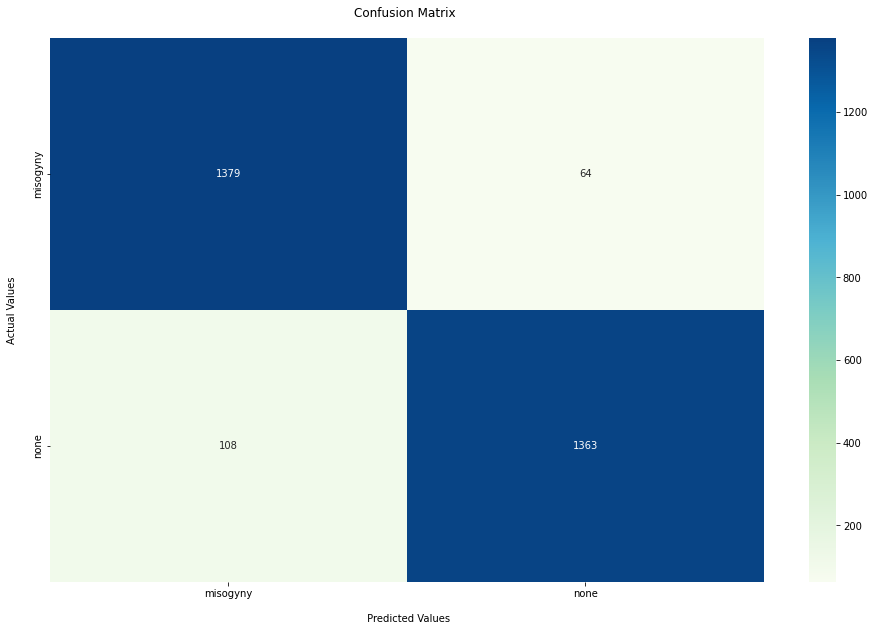

In [48]:
import sklearn.metrics as metrics

plt.figure(figsize=(16,10))
fx=sns.heatmap(metrics.confusion_matrix(real_values, preds), annot=True, fmt="d",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['misogyny', 'none'])
fx.yaxis.set_ticklabels(['misogyny', 'none'])
plt.show()

In [65]:
real_values

tensor([1, 0, 1,  ..., 1, 0, 0])

In [64]:
preds

tensor([1, 0, 0,  ..., 1, 1, 0])

#   Deployement section

pip install streamlit

In [2]:
!pip install streamlit-folium

     |████████████████████████████████| 422 kB 2.0 MB/s            


In [3]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2022-12-23 13:12:11--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 18.205.222.128, 52.202.168.65, 54.237.133.81, ...
Connecting to bin.equinox.io (bin.equinox.io)|18.205.222.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  39.4MB/s    in 0.3s    

2022-12-23 13:12:11 (39.4 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]



In [4]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [5]:
pip install protobuf==3.20.0

     |████████████████████████████████| 1.0 MB 2.1 MB/s            
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.4
    Uninstalling protobuf-3.19.4:
      Successfully uninstalled protobuf-3.19.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
explainable-ai-sdk 1.3.2 requires xai-image-widget, which is not installed.
beatrix-jupyterlab 3.1.6 requires google-cloud-bigquery-storage, which is not installed.
tfx-bsl 1.5.0 requires absl-py<0.13,>=0.9, but you have absl-py 0.15.0 which is incompatible.
tfx-bsl 1.5.0 requires numpy<1.20,>=1.16, but you have numpy 1.20.3 which is incompatible.
tfx-bsl 1.5.0 requires pyarrow<6,>=1, but you have pyarrow 6.0.1 which is incompatible.
tfx-bsl 1.5.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*

In [6]:
!pip install pyngrok==4.1.1
from pyngrok import ngrok
!ngrok authtoken 2IQAUyPDv3N8HMM7xjJzdIiwgVF_44q33gJddficZYtPK753z

  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15984 sha256=673e9eb83aef528a6104388624e56b662836896af98ac384ea64e783ef8a92d8
  Stored in directory: /root/.cache/pip/wheels/b1/d9/12/045a042fee3127dc40ba6f5df2798aa2df38c414bf533ca765
Successfully built pyngrok
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml                                      


In [ ]:
get_ipython().system_raw('./ngrok http 8501 &')

In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

In [ ]:

!streamlit run /kaggle/input/my-model/main.py
